In [1]:
# Imports 
import pandas as pd
from joblib import load

Due to the time it takes to run the previous notebook, I'm starting a new one and using the results from the GridSearchCV runs to carry on here. 

# Recap
Since this is a new notebook, I'll restate the relevant goals from the previous notebook: 

---
### The Solution(s)?
1. I could do what I did with the other wine related datasets and train a tree model to get which are the ~3-5 most important factors, and what ranges they should lie in. While I think this will work - and I intend to do it - it also tends to always end up focussing on only one particular ordered set of questions with the same answers; country A, variety B, price C, etc. which doesn't tell me anything about good wines from country F (and I assume that country F must have some good wine or other? Additionally, since several of the features are nominal, non-ordinal data, but they have been represented ordinally, decision trees will not be able to select features out of order from their representation, and this will limit the usefulness of the trained models regardless of how accurate they are. 

2. I could use some sort of relatively simple model (e.g. linear regression) and try to determine from the coefficients what features are important, and what values are better, but attempts to determine feature relevance in that way usually fail, as coefficients do not correlate with feature importance. I could use some sort of feature selection to further reduce the number of features I have, and make the result easier to understand somehow? The effectiveness of that is unclear, but unlikely. Then again, [scikit-learn's `SelectFromModel`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html "scikit-learn docs") exists to do just that - automatically - so maybe that's worth a look. This still doesn't actually tell me what _values_ of features mean good wine though, so I probably won't do this. 
---

Now that I've got the results, I'll first take a look at them and any graphics of their estimators and coefficients that seem relevant. 

Let's see what the results were: 

## Label encoded decision tree regressor
Start time: 09:52:40.319247  
End time: 10:44:32.850237  
Time elapsed: 0:51:52.530990  

DecisionTreeRegressor GridSearchCV label_encoded best score: 0.3728115322561326  
DecisionTreeRegressor GridSearchCV label_encoded best estimator:  
- criterion='mae'
- max_depth=9
- max_leaf_nodes=39

DecisionTreeRegressor GridSearchCV label_encoded best estimator test mae: 1.8624319084110423  

![Label Encoded GridSearchCV Decision Tree Regressor](../output/label_encoded_gridsearchcv_decisiontreeregressor.png)

country: 5  
price: 14  
province: 6  
region_1: 2  
region_2: 1  
variety: 1  
winery: 0  
vintage: 9  

## Label encoded non null decision tree regressor
Start time: 10:44:33.542068  
End time: 11:35:03.498803  
Time elapsed: 0:50:29.956735  

DecisionTreeRegressor GridSearchCV label_encoded_non_null best score: 0.3728115322561326  
DecisionTreeRegressor GridSearchCV label_encoded_non_null best estimator:  
- criterion='mae'
- max_depth=9
- max_leaf_nodes=39

DecisionTreeRegressor GridSearchCV label_encoded_non_null best estimator test mae: 1.8624319084110423  

![Label Encoded Non-Null GridSearchCV Decision Tree Regressor](../output/label_encoded_non_null_gridsearchcv_decisiontreeregressor.png)

country: 5
price: 14
province: 6
region_1: 2
region_2: 1
variety: 1
winery: 0
vintage: 9

## Mixed encoding non null decision tree regressor
Start time: 11:35:04.171638  
End time: 15:06:48.229524  
Time elapsed: 3:31:44.057886  

DecisionTreeRegressor GridSearchCV mixed_encoding best score: 0.37408604425045067  
DecisionTreeRegressor GridSearchCV mixed_encoding best estimator:  
- criterion='mae'
- max_depth=9
- max_leaf_nodes=39

DecisionTreeRegressor GridSearchCV mixed_encoding best estimator test mae: 1.8606161327055057  

![Mixed Encoding GridSearchCV Decision Tree Regressor](../output/mixed_encoding_gridsearchcv_decisiontreeregressor.png)

country: 0  
price: 13  
province: 6  
region_1: 2  
region_2: 0  
variety: 1  
winery: 0  
vintage: 7  
South Africa:  
Austria: 4  
Portugal: 1  
Germany: 1  
US: 1  
Central Coast: 1  

Skip this part if you agree that looking at long lists of numbers is boring.  
Scroll down to the graphs.  
_On your way, do note how only two of the mixed encoding coeffieicnts aren't negative._  

## Label encoded linear regression
Start time: 14:22:27.445136  
End time: 14:22:27.475975  
Time elapsed: 0:00:00.030839  

Linear regression label_encoded test mae: 2.2236270134283433  
Linear regression label_encoded coefficients:  
- country: -0.05181204
- price: 1.18341613
- province: 0.0160254
- region_1: -0.02184531
- region_2: 0.12735333
- variety: -0.03476417
- winery: -0.03688167
- vintage: 0.18030469



## Label encoded non null linear regression
Start time: 14:22:54.769536  
End time: 14:22:54.802231  
Time elapsed: 0:00:00.032695  

Linear regression label_encoded_non_null test mae: 2.2236270134283433  
Linear regression label_encoded_non_null coefficients:  
- country: -0.05181204
- price: 1.18341613
- province: 0.0160254
- regoin_1: -0.02184531
- region_2: 0.12735333
- variety: -0.03476417
- winery: -0.03688167
- vintage: 0.18030469



## Mixed encoding linear regression
Start time: 14:23:17.089874  
End time: 14:23:17.725354  
Time elapsed: 0:00:00.635480  

Linear regression mixed_encoding test mae: 31901654.235031657  
Linear regression mixed_encoding coefficients:  
- price: 1.10959813e+00
- province: -1.45252901e-01
- region_1: -4.63884083e-02
- variety: -8.29298886e-03
- winery: -1.94926655e-02
- vintage: 1.61539922e-01
- Argentina: -2.20930113e+11
- Armenia: -4.21967277e+09
- Australia: -1.73600537e+11
- Austria: -2.08261605e+11
- Bosnia and Herzegovina: -5.96748785e+09
- Brazil: -2.66822146e+10
- Bulgaria: -4.30096463e+10
- Canada: -5.70293605e+10
- Chile: -2.37356815e+11
- China: -4.21967277e+09
- Croatia: -3.18486784e+10
- Cyprus: -1.19346084e+10
- Czech Republic: -1.33431609e+10
- Egypt: -4.21967277e+09
- England: -3.26755514e+10
- France: -4.95940517e+11
- Georgia: -3.50390065e+10
- Germany: -1.70453252e+11
- Greece: -7.76715073e+10
- Hungary: -4.52244808e+10
- India: -1.03357801e+10
- Israel: -8.17730548e+10
- Italy: -4.71260979e+11
- Lebanon: -2.19231385e+10
- Luxembourg: -7.30861265e+09
- Macedonia: -1.19346084e+10
- Mexico: -2.98300919e+10
- Moldova: -2.73408533e+10
- Morocco: -1.88691111e+10
- NaN: -3.01267615e+10
- New Zealand: -1.35224372e+11
- Peru: -1.46165505e+10
- Portugal: -2.69630010e+11
- Romania: -4.00130516e+10
- Serbia: -1.33431609e+10
- Slovakia: -2.80870116e+11
- Slovenia: -3.50390065e+10
- South Africa: -1.36251274e+11
- Spain: -2.89052025e+11
- Switzerland: -1.03357801e+10
- Turkey: -3.40089194e+10
- US: -6.50217506e+11
- Ukraine: -1.26584988e+10
- Uruguay: -3.77266036e+10
- California Other: -6.27878887e+10
- Central Coast: -1.23224187e+11
- Central Valley: -3.95179005e+10
- Columbia Valley: -1.06154609e+11
- Finger Lakes: -5.11695682e+10
- Long Island: -3.16420880e+10
- NaN: -2.14905790e+11
- Napa: -9.82620098e+10
- Napa-Sonoma: -4.18994908e+10
- New York Other: -1.86584760e+10
- North Coast: -3.04342750e+10
- Oregon Other: -3.30141409e+10
- Sierra Foothills: -4.65145325e+10
- Sonoma: -1.12309778e+11
- South Coast: -2.00929021e+10
- Southern Oregon: -3.70309347e+10
- Washington Other: -2.80709043e+10
- Willamette Valley: -7.03495437e+10

label_encoded:
country
price
province
region_1
region_2
variety
winery
vintage

X_train_label_encoded_non_null:
country
price
province
region_1
region_2
variety
winery
vintage

mixed_encoding: 
price
province
region_1
variety
winery
vintage
Argentina
Armenia
Australia
Austria
Bosnia and Herzegovina
Brazil
Bulgaria
Canada
Chile
China
Croatia
Cyprus
Czech Republic
Egypt
England
France
Georgia
Germany
Greece
Hungary
India
Israel
Italy
Lebanon
Luxembourg
Macedonia
Mexico
Moldova
Morocco
NaN
New Zealand
Peru
Portugal
Romania
Serbia
Slovakia
Slovenia
South Africa
Spain
Switzerland
Turkey
US
Ukraine
Uruguay
California Other
Central Coast
Central Valley
Columbia Valley
Finger Lakes
Long Island
NaN
Napa
Napa-Sonoma
New York Other
North Coast
Oregon Other
Sierra Foothills
Sonoma
South Coast
Southern Oregon
Washington Other
Willamette Valley

In [2]:
label_encoded_data = {'country': -0.05181204, 'price': 1.18341613, 'province': 0.0160254, 'region_1': -0.02184531, 'region_2': 0.12735333, 'variety': -0.03476417, 'winery': -0.03688167, 'vintage': 0.18030469}
label_encoded_linear_regression_series = pd.Series(data = label_encoded_data)

label_encoded_non_null_data = {'country': -0.05181204, 'price': 1.18341613, 'province': 0.0160254, 'regoin_1': -0.02184531, 'region_2': 0.12735333, 'variety': -0.03476417, 'winery': -0.03688167, 'vintage': 0.18030469}
label_encoded_non_null_linear_regression_series = pd.Series(data = label_encoded_non_null_data)

mixed_encoding_data = {'price': 1.10959813e+00, 'province': -1.45252901e-01, 'region_1': -4.63884083e-02, 'variety': -8.29298886e-03, 'winery': -1.94926655e-02, 'vintage': 1.61539922e-01, 'Argentina': -2.20930113e+11, 'Armenia': -4.21967277e+09, 'Australia': -1.73600537e+11, 'Austria': -2.08261605e+11, 'Bosnia and Herzegovina': -5.96748785e+09, 'Brazil': -2.66822146e+10, 'Bulgaria': -4.30096463e+10, 'Canada': -5.70293605e+10, 'Chile': -2.37356815e+11, 'China': -4.21967277e+09, 'Croatia': -3.18486784e+10, 'Cyprus': -1.19346084e+10, 'Czech Republic': -1.33431609e+10, 'Egypt': -4.21967277e+09, 'England': -3.26755514e+10, 'France': -4.95940517e+11, 'Georgia': -3.50390065e+10, 'Germany': -1.70453252e+11, 'Greece': -7.76715073e+10, 'Hungary': -4.52244808e+10, 'India': -1.03357801e+10, 'Israel': -8.17730548e+10, 'Italy': -4.71260979e+11, 'Lebanon': -2.19231385e+10, 'Luxembourg': -7.30861265e+09, 'Macedonia': -1.19346084e+10, 'Mexico': -2.98300919e+10, 'Moldova': -2.73408533e+10, 'Morocco': -1.88691111e+10, 'NaN': -3.01267615e+10, 'New Zealand': -1.35224372e+11, 'Peru': -1.46165505e+10, 'Portugal': -2.69630010e+11, 'Romania': -4.00130516e+10, 'Serbia': -1.33431609e+10, 'Slovakia': -2.80870116e+11, 'Slovenia': -3.50390065e+10, 'South Africa': -1.36251274e+11, 'Spain': -2.89052025e+11, 'Switzerland': -1.03357801e+10, 'Turkey': -3.40089194e+10, 'US': -6.50217506e+11, 'Ukraine': -1.26584988e+10, 'Uruguay': -3.77266036e+10, 'California Other': -6.27878887e+10, 'Central Coast': -1.23224187e+11, 'Central Valley': -3.95179005e+10, 'Columbia Valley': -1.06154609e+11, 'Finger Lakes': -5.11695682e+10, 'Long Island': -3.16420880e+10, 'NaN': -2.14905790e+11, 'Napa': -9.82620098e+10, 'Napa-Sonoma': -4.18994908e+10, 'New York Other': -1.86584760e+10, 'North Coast': -3.04342750e+10, 'Oregon Other': -3.30141409e+10, 'Sierra Foothills': -4.65145325e+10, 'Sonoma': -1.12309778e+11, 'South Coast': -2.00929021e+10, 'Southern Oregon': -3.70309347e+10, 'Washington Other': -2.80709043e+10, 'Willamette Valley': -7.03495437e+10}
mixed_encoding_linear_regression_series = pd.Series(data = mixed_encoding_data)

In [3]:
label_encoded_linear_regression_series.plot.bar(title='Label Encoded Linear Regression Coefficients', figsize=(15,5))

The coefficients for the label encoded data indicate fairly strongly that price is the most important factor in determining the quality of the wine. Vintage is a distant second, and region_2 third. 

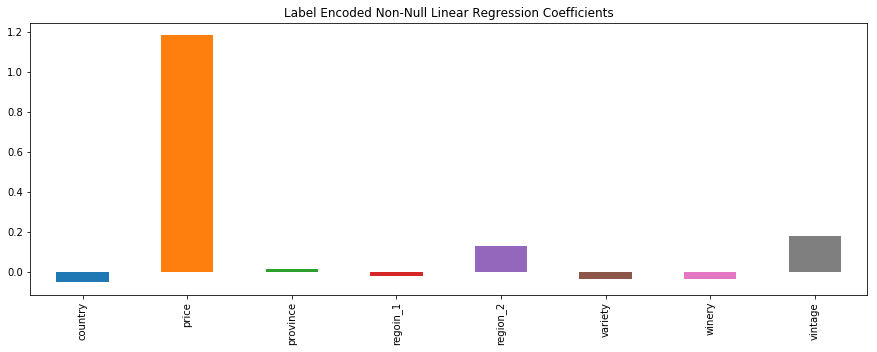

In [4]:
label_encoded_non_null_linear_regression_series.plot.bar(title='Label Encoded Non-Null Linear Regression Coefficients', figsize=(15,5))

The coefficients for the label encoded non-null data indicate the exact same thing as those of the label encoded model - since they are exactly the same. 

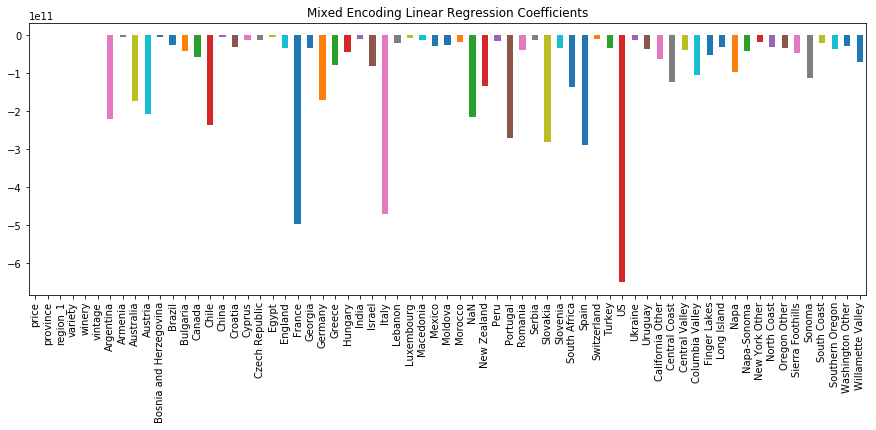

In [5]:
mixed_encoding_linear_regression_series.plot.bar(title='Mixed Encoding Linear Regression Coefficients', figsize=(15,5))

The coefficients of the mixed encoding model are over too extreme a range to be able to tell much from a bar chart, but what you can tell is that every country and region_2 value is both negative and has a huge magnitude (x10<sup>-9</sup> to x10<sup>-11</sup>).  
Notably, the only values that are too small to be seen on the bar chart are those that are label encoded. Let's take a closer look at those.  

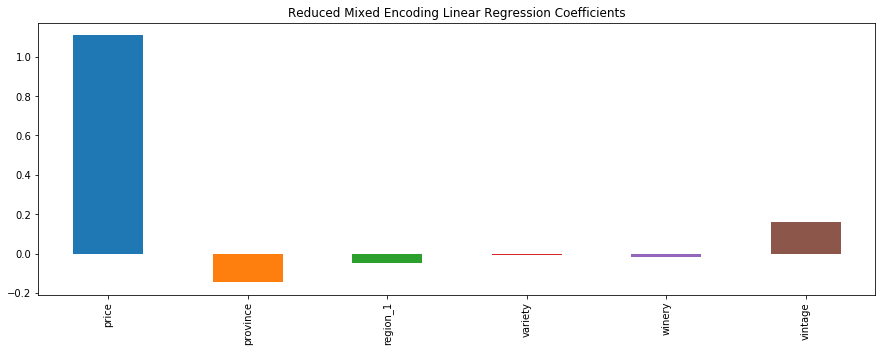

In [6]:
reduced_mixed_encoding_linear_regression_series = mixed_encoding_linear_regression_series[['price', 'province', 'region_1', 'variety', 'winery', 'vintage']]
reduced_mixed_encoding_linear_regression_series.plot.bar(title='Reduced Mixed Encoding Linear Regression Coefficients', figsize=(15,5))

Again, the most important factors in determining a wine's quality are it's price, and it's vintage.  

This means that the most important factors for a good wine are it's price, it's alcohol content, and to a limited extent how old it is, and possibly that the younger it is the better. 